## 6. EDA - Exploratory Data Analysis

https://www.data-to-viz.com/


### Insigths from the EDA:

EDA can retrieve a overview of the data but also more relevant insights and associations.
    
### How much data do we have??

**~38_500 clothing items without NA's**:

* Classified in **616 brands** -filtering types with > 10 products
* Classified in **8 types** -filtering types with > 410 products
* Classified in **16 colors** -filtering colors with > 1100 products


### 0. Import modules and load data

In [1]:
# data manipualtion basics
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore') # ignorar warnings

# plotting
import seaborn as sns  # esta basada en matplotlib
import pylab as plt  # libreria basica para pintar
#import matplotlib.pyplot as plt
from matplotlib_venn import venn2

plt.rcParams['figure.figsize']=(8, 6)  # tamaño por defecto, decenas de pixeles

%matplotlib inline

## my own functions
from src import dataanalysis_fun1 as eda # Import my module


In [23]:
clothes=pd.read_csv("../data/clean/clothes_simple.csv")

## How much data do we have??

**~38_500 clothing items without NA's**:

* Classified in **616 brands** -filtering types with > 10 products
* Classified in **8 types** -filtering types with > 410 products
* Classified in **16 colors** -filtering colors with > 1100 products

In [24]:
clothes.head()

,product_id,brand_class,colour,gender,type,price_pack
0,1,middle,beige,men,sweater,36.19
1,2,middle,beige,men,sweater,45.40
2,3,middle,beige,men,sweater,49.94
3,4,middle,beige,men,sweatshirt,62.44
4,5,middle,brown,men,sweater,62.44


In [25]:
eda.categ_summ(clothes)

,count,unique,top,freq,unicount_ratio,resto_abs,resto_per
brand_class,37783,3,low,16498,0.000079,21285,56.33486
colour,37783,15,beige,4222,0.000397,33561,88.825662
gender,37783,2,women,24437,0.000053,13346,35.322764
type,37783,6,tshirt,8525,0.000159,29258,77.436943


## Data distribution and data scaling

We only have one continuous variable (price_pack) so we **do not need to scale the data** <br/>
I will **not drop outliers** since it is expected to find overwhelming prices in high class brands

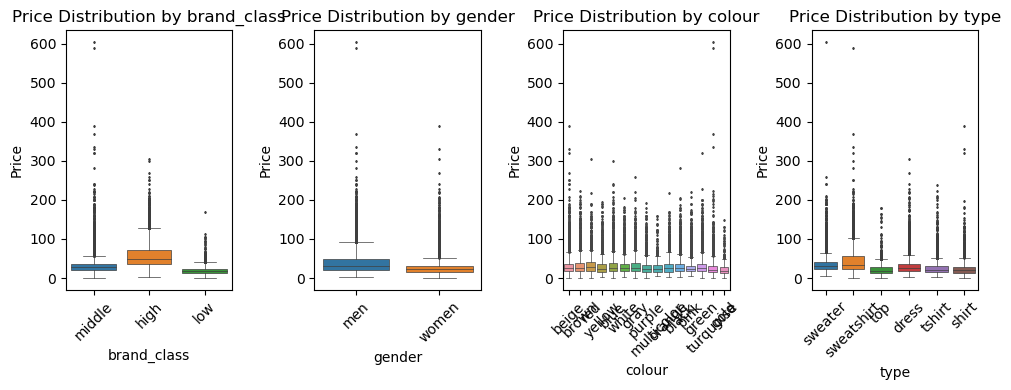

In [26]:
df=clothes
categorical_columns = ['brand_class', 'gender', 'colour', 'type']

fig, axes = plt.subplots(1, 4, figsize=(10, 4))  # 1 row, 2 columns for side-by-side plots

for i, column in enumerate(categorical_columns):
    sns.boxplot(x=column, y='price_pack', data=df, ax=axes[i], fliersize=1, linewidth=0.5)
    axes[i].set_title(f'Price Distribution by {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Price')
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

### Most popular `colors` by `type` of clothing

There are patent differences in the distribution of clothes type and color when comparing men and women

In [27]:
wo_colortype_df=clothes[clothes["gender"]=="women"].pivot_table(columns="type", index="colour",  aggfunc="size", fill_value=0)
wo_colortype_df["total"]=wo_colortype_df.sum(axis=1)

me_colortype_df=clothes[clothes["gender"]=="men"].pivot_table(columns="type", index="colour",  aggfunc="size", fill_value=0)
me_colortype_df["total"]=me_colortype_df.sum(axis=1)

column_list=wo_colortype_df.columns[:-1]

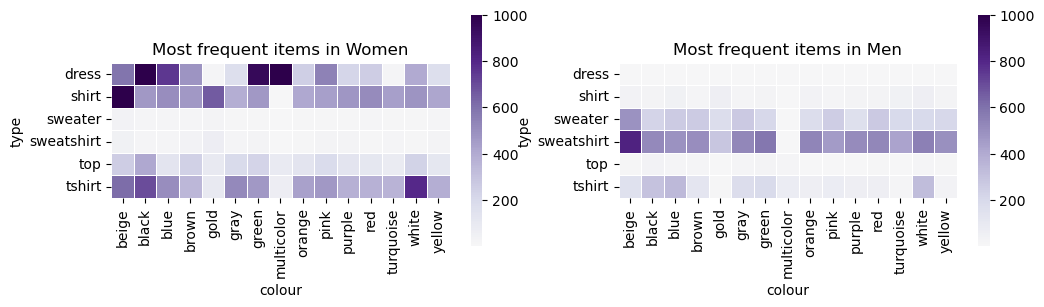

In [29]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))  # 1 row, 2 columns for side-by-side plots

#vmin = min(wo_colortype_df.min().min(), me_colortype_df.min().min())
#vmax = max(wo_colortype_df.max().max(), me_colortype_df.max().max())

vmin = 1
vmax = 1000

heatmap1= sns.heatmap(wo_colortype_df[column_list].T,
            cmap="PuOr",
            center=0,
            square=True,
            annot=False,
            linewidths=0.5,
            cbar_kws={'shrink': 0.5},vmin=vmin,vmax=vmax,  ax=axes[0]);
heatmap1.set_title('Most frequent items in Women');

heatmap2 = sns.heatmap(me_colortype_df[column_list].T,
            cmap="PuOr",
            center=0,
            square=True,
            annot=False,
            linewidths=0.5,
            cbar_kws={'shrink': 0.5},vmin=vmin,vmax=vmax,  ax=axes[1])
heatmap2.set_title('Most frequent items in Men');

### Type of clothing is highly specific to the gender

* In the next plot we can see that `dress tops o shirt` are more abundant in women collection whereas `sweatshirt o sweater` are more frequent for men.

* It is also noteworthy that in **high class branding**, there are more clothing items in the ´men collection. This trend can indicate that men clothing is indeed more expensive than women items.

In [30]:
colorgend_df=clothes.pivot_table(columns=["gender", "brand_class"], index="colour",  aggfunc="size")
colnames=list(colorgend_df.columns)
colorgend_df=colorgend_df.droplevel(level=1, axis=1)
colorgend_df.columns=[c[0]+"_"+ c[1] for c in colnames]
colorgend_df=colorgend_df.sort_values("men_high", ascending=False)

typegend_df=clothes.pivot_table(columns=["gender", "brand_class"], index="type",  aggfunc="size")
colnames=list(typegend_df.columns)
typegend_df=typegend_df.droplevel(level=1, axis=1)
typegend_df.columns=[c[0]+"_"+ c[1] for c in colnames]
typegend_df=typegend_df.sort_values("men_high", ascending=False)

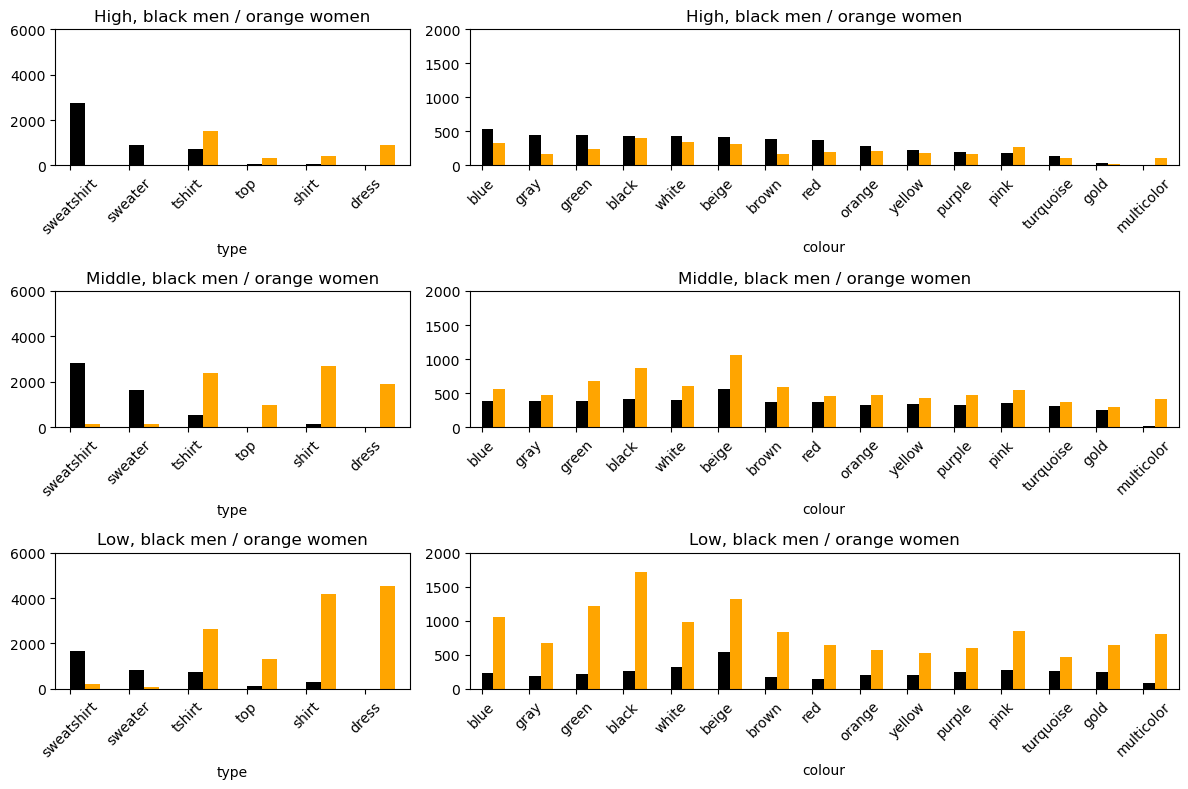

In [31]:
fig, ax = plt.subplots(3, 2, figsize=(12, 8), gridspec_kw={'width_ratios': [1, 2]})    # figura de 1 fila y 3 columnas

colorgend_df[["men_high","women_high"]].plot.bar(rot=45,  align='edge', logy=False, color=["black", "orange"], ax=ax[0,1], legend=False)
ax[0,1].set_title("High, black men / orange women")
ax[0,1].set_ylim(0, 2000)


typegend_df[["men_high","women_high"]].plot.bar(rot=45,  align='edge', logy=False, color=["black", "orange"], ax=ax[0,0], legend=False)
ax[0, 0].set_title("High, black men / orange women")
ax[0, 0].set_ylim(0, 6000)

colorgend_df[["men_middle","women_middle"]].plot.bar(rot=45,  align='edge', logy=False, color=["black", "orange"], ax=ax[1,1], legend=False)
ax[1, 1].set_title("Middle, black men / orange women")
ax[1, 1].set_ylim(0, 2000)

typegend_df[["men_middle","women_middle"]].plot.bar(rot=45,  align='edge', logy=False, color=["black", "orange"], ax=ax[1,0], legend=False)
ax[1, 0].set_title("Middle, black men / orange women")
ax[1, 0].set_ylim(0, 6000)

colorgend_df[["men_low","women_low"]].plot.bar(rot=45,  align='edge', logy=False, color=["black", "orange"], ax=ax[2,1], legend=False)
ax[2, 1].set_title("Low, black men / orange women")
ax[2, 1].set_ylim(0, 2000)

typegend_df[["men_low","women_low"]].plot.bar(rot=45,  align='edge', logy=False, color=["black", "orange"], ax=ax[2,0], legend=False)
ax[2, 0].set_title("Low, black men / orange women")
ax[2, 0].set_ylim(0, 6000)

plt.tight_layout();